In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bankfull/bank-full.csv


In [2]:
df = pd.read_csv('/kaggle/input/bankfull/bank-full.csv',sep=',')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['job_code'] = LE.fit_transform(df['job'])
df['marital_code'] = LE.fit_transform(df['marital'])
df['education_code'] = LE.fit_transform(df['education'])
df['housing_code'] = LE.fit_transform(df['housing'])
df['loan_code'] = LE.fit_transform(df['loan'])
df['contact_code'] = LE.fit_transform(df['contact'])
df['poutcome_code'] = LE.fit_transform(df['poutcome'])
df['subscribed'] = LE.fit_transform(df['y'])
df=df.drop(['job','marital','education','housing','loan','contact','poutcome','y','day','month','default'],axis=1)
X=df.drop('subscribed',axis=1)
y= df['subscribed']


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(13,10,2),max_iter=1000)
mlp.fit(X_train,y_train)
predictions =mlp.predict(X_test)

[[9665  346]
 [ 806  486]]


0.8980801557108732

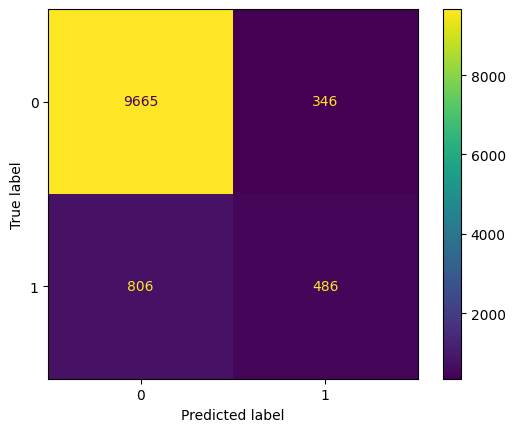

In [15]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictions)
print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_).plot()
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)